### Decision Tree for Classification of Iris Flowers

1. First, we import several dependencies such as pandas, numpy, seaborn, and also several modules in scikit-learn. We also going to read the Iris CSV file using pandas.
<br> For more info on using pandas, see: https://www.datacamp.com/community/tutorials/pandas-read-csv
<br> For more information on the Iris dataset, see: https://en.wikipedia.org/wiki/Iris_flower_data_set

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz
from sklearn import preprocessing

df = pd.read_csv('Iris.csv')


2. After importing the data, let’s check whether we have null values in our dataset or not. We will see there are no null/missing values.

In [47]:
df.isnull().any()

sepal.length    False
sepal.width     False
petal.length    False
petal.width     False
variety         False
vnum            False
dtype: bool

3. Let's understand more about the data. We will start by getting to know the type of each column values.  We see that the width and length column are represented using float64 and the name of the species uses object or string.



In [48]:
df.dtypes

sepal.length    float64
sepal.width     float64
petal.length    float64
petal.width     float64
variety          object
vnum              int64
dtype: object

4. Let’s look at a quick summary of the data.

In [49]:
df.describe()

,sepal.length,sepal.width,petal.length,petal.width,vnum
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


5. Everything checks out. Sort of. Notice that petal.width has a minimum value of 0.1 and a maximum value of 2.5. Let’s plot the petal.width.

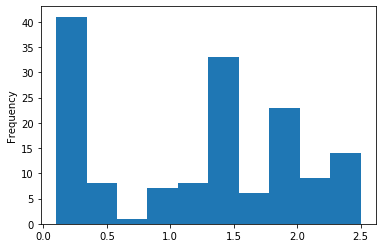

In [50]:
df['petal.width'].plot.hist()
plt.show()

6. Ok, we see that about 50 flowers in this dataset have values between 0.1 and 0.5. Let’s check the file.

Everything looks ok, the "small" petal.width are all association with variety Setosa. This could just be their defining feature!

In [51]:
print(df[['petal.width','variety']].head(5))

   petal.width variety
0          0.2  Setosa
1          0.2  Setosa
2          0.2  Setosa
3          0.2  Setosa
4          0.2  Setosa


7. Let's load the rest of the data into variables and visualize the data.

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


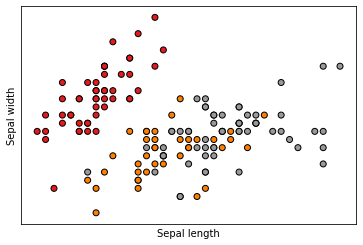

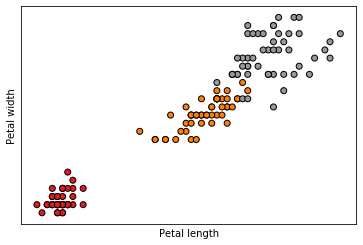

In [2]:
X = df[['sepal.length', 'sepal.width']].values
Y = df['vnum'].values
print(Y)
# Plot the training points
#plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1],c=Y,cmap=plt.cm.Set1,edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xticks(())
plt.yticks(())
plt.show()

X = df[['petal.length', 'petal.width']].values
Y = df['vnum'].values
# Plot the training points
#plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1],c=Y,cmap=plt.cm.Set1,edgecolor='k')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.xticks(())
plt.yticks(())
plt.show()



8. Let's split into training data and testing data, and run the decision tree algorithm.

In [3]:
X = df[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']].values
Y = df['variety'].values
(X_train,X_test,Y_train,Y_test)=train_test_split(X, Y, test_size=0.5)

clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train)
clf.score(X_test, Y_test)


0.9466666666666667

9. Visualize the decision tree.  Note, you may need to run: 
<br> conda install -c anaconda graphviz 
<br> pip install graphviz

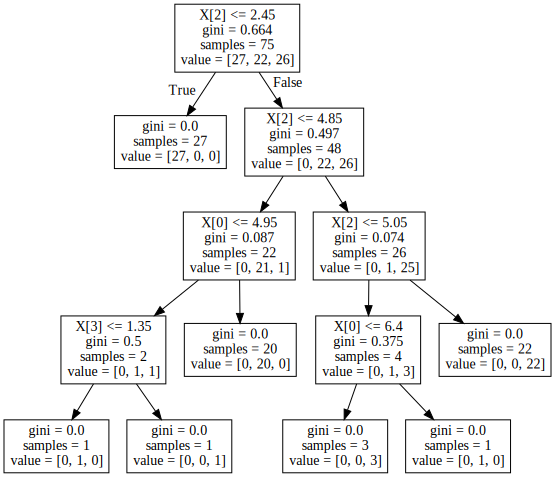

In [4]:
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 

graph
# !start iris.pdf